## Q4(b) Weighted Loss

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [2]:
class_weights = 1.0 / torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])
# class_weights[9] = 0 # ignore unlabeled class
# class_weights

In [3]:
# def compute_class_weights(dataloader):
#     # Labels: batch_size x height x width
#     total_num_pixels = 0
#     n_class = 10
#     class_weights = torch.zeros(n_class)
#     for i, (inputs, labels) in enumerate(dataloader):
#         total_num_pixels += labels.shape[0] * labels.shape[1] * labels.shape[2]
#         for cur_class in range(n_class):
#             class_weights[cur_class] += torch.sum(labels == cur_class)
#         print("SANITY CHECK:", total_num_pixels, class_weights.sum())
#         print("class_weights:", class_weights)
        
#     return class_weights / total_num_pixels

In [4]:
# train_dataset_original_1 = TASDataset('tas500v1.1') 
# train_loader_1 = DataLoader(dataset=train_dataset_original_1, batch_size= 16, shuffle=False)

# class_weights = compute_class_weights(train_loader_1)
# print(class_weights)

In [5]:
#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_4b3_weighted_noset0"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 3.6152890069144115
IoU at epoch: 0 is 0.006663788779471872
Pixel acc at epoch: 0 is 0.04922774061560631
in train


  0%|          | 0/30 [00:00<?, ?it/s]

epoch0, iter0, loss: 3.6053407192230225
epoch0, iter10, loss: 3.1516311168670654
epoch0, iter20, loss: 3.017371892929077
epoch0, iter30, loss: 2.6176819801330566
epoch0, iter40, loss: 2.4273219108581543
epoch0, iter50, loss: 1.6578612327575684
Finish epoch 0, time elapsed 98.47663569450378
in val


  3%|▎         | 1/30 [01:47<51:55, 107.42s/it]

Loss at epoch: 0 is 2.0177546569279263
IoU at epoch: 0 is 0.16194237732581887
Pixel acc at epoch: 0 is 0.4419825715678079
epoch1, iter0, loss: 2.0920937061309814
epoch1, iter10, loss: 2.1906280517578125
epoch1, iter20, loss: 2.3811941146850586
epoch1, iter30, loss: 1.5333549976348877
epoch1, iter40, loss: 1.4452152252197266
epoch1, iter50, loss: 2.0067381858825684
Finish epoch 1, time elapsed 104.73953032493591
in val


  7%|▋         | 2/30 [03:40<51:44, 110.88s/it]

Loss at epoch: 1 is 1.9001787560326713
IoU at epoch: 1 is 0.17838512072703328
Pixel acc at epoch: 1 is 0.5890879801341465
epoch2, iter0, loss: 1.387518286705017
epoch2, iter10, loss: 2.545166254043579
epoch2, iter20, loss: 1.3133420944213867
epoch2, iter30, loss: 1.78416907787323
epoch2, iter40, loss: 1.0298824310302734
epoch2, iter50, loss: 0.699738621711731
Finish epoch 2, time elapsed 101.87544918060303
in val


 10%|█         | 3/30 [05:30<49:39, 110.37s/it]

Loss at epoch: 2 is 1.2851037723677499
IoU at epoch: 2 is 0.26934369779335987
Pixel acc at epoch: 2 is 0.7490226200648716
epoch3, iter0, loss: 1.1791787147521973
epoch3, iter10, loss: 1.2460238933563232
epoch3, iter20, loss: 0.968062162399292
epoch3, iter30, loss: 1.521897315979004
epoch3, iter40, loss: 1.765270709991455
epoch3, iter50, loss: 1.1549776792526245
Finish epoch 3, time elapsed 105.70121145248413
in val


 13%|█▎        | 4/30 [07:25<48:33, 112.08s/it]

Loss at epoch: 3 is 1.1629315784999303
IoU at epoch: 3 is 0.27896564968906284
Pixel acc at epoch: 3 is 0.7514831508908953
epoch4, iter0, loss: 1.0424762964248657
epoch4, iter10, loss: 1.3205959796905518
epoch4, iter20, loss: 1.3286538124084473
epoch4, iter30, loss: 1.5885008573532104
epoch4, iter40, loss: 0.9395800828933716
epoch4, iter50, loss: 0.7827988266944885
Finish epoch 4, time elapsed 105.64220023155212
in val


 17%|█▋        | 5/30 [09:18<46:56, 112.64s/it]

Loss at epoch: 4 is 0.9720004200935364
IoU at epoch: 4 is 0.31689231397025497
Pixel acc at epoch: 4 is 0.7587129984583173
epoch5, iter0, loss: 0.7511385679244995
epoch5, iter10, loss: 0.9969627857208252
epoch5, iter20, loss: 0.7830635905265808
epoch5, iter30, loss: 0.569206714630127
epoch5, iter40, loss: 0.8636155128479004
epoch5, iter50, loss: 1.0991357564926147
Finish epoch 5, time elapsed 105.24753022193909
in val


 20%|██        | 6/30 [11:11<45:04, 112.68s/it]

Loss at epoch: 5 is 0.7741073540278843
IoU at epoch: 5 is 0.3739772855231323
Pixel acc at epoch: 5 is 0.8042393326759338
epoch6, iter0, loss: 0.9467319846153259
epoch6, iter10, loss: 0.7890310883522034
epoch6, iter20, loss: 0.7808094620704651
epoch6, iter30, loss: 0.8398993015289307
epoch6, iter40, loss: 0.550788164138794
epoch6, iter50, loss: 0.932701826095581
Finish epoch 6, time elapsed 103.10321378707886
in val


 23%|██▎       | 7/30 [13:03<43:04, 112.36s/it]

Loss at epoch: 6 is 0.6937919471945081
IoU at epoch: 6 is 0.3881348831549688
Pixel acc at epoch: 6 is 0.8183836851801191
epoch7, iter0, loss: 0.7869585752487183
epoch7, iter10, loss: 0.9316339492797852
epoch7, iter20, loss: 0.5703837275505066
epoch7, iter30, loss: 0.6829012036323547
epoch7, iter40, loss: 0.6854645013809204
epoch7, iter50, loss: 1.095444679260254
Finish epoch 7, time elapsed 105.70548605918884
in val


 27%|██▋       | 8/30 [14:56<41:20, 112.75s/it]

Loss at epoch: 7 is 0.6822344660758972
IoU at epoch: 7 is 0.4039451519838827
Pixel acc at epoch: 7 is 0.8221220885004316
epoch8, iter0, loss: 0.6701533198356628
epoch8, iter10, loss: 0.4570850729942322
epoch8, iter20, loss: 0.6528627872467041
epoch8, iter30, loss: 1.2281163930892944
epoch8, iter40, loss: 0.47400176525115967
epoch8, iter50, loss: 0.835862398147583
Finish epoch 8, time elapsed 101.54164242744446
in val


 30%|███       | 9/30 [16:47<39:11, 111.99s/it]

Loss at epoch: 8 is 0.7203052639961243
IoU at epoch: 8 is 0.392398048013416
Pixel acc at epoch: 8 is 0.8047709805624825
epoch9, iter0, loss: 0.47972598671913147
epoch9, iter10, loss: 0.9555554986000061
epoch9, iter20, loss: 0.5083354711532593
epoch9, iter30, loss: 0.8328326940536499
epoch9, iter40, loss: 1.10617196559906
epoch9, iter50, loss: 0.5493334531784058
Finish epoch 9, time elapsed 103.74178504943848
in val


 33%|███▎      | 10/30 [18:38<37:18, 111.93s/it]

Loss at epoch: 9 is 0.6216692541326795
IoU at epoch: 9 is 0.4243572763042723
Pixel acc at epoch: 9 is 0.8276150907788958
epoch10, iter0, loss: 0.5449598431587219
epoch10, iter10, loss: 0.6186935305595398
epoch10, iter20, loss: 0.7359740734100342
epoch10, iter30, loss: 0.5182960629463196
epoch10, iter40, loss: 0.49229228496551514
epoch10, iter50, loss: 0.6844472885131836
Finish epoch 10, time elapsed 99.40189981460571
in val


 37%|███▋      | 11/30 [20:26<34:59, 110.52s/it]

Loss at epoch: 10 is 0.7155259677342006
IoU at epoch: 10 is 0.38013931826156167
Pixel acc at epoch: 10 is 0.7991794262613569
epoch11, iter0, loss: 0.5365246534347534
epoch11, iter10, loss: 0.536482036113739
epoch11, iter20, loss: 0.5461933612823486
epoch11, iter30, loss: 0.5712818503379822
epoch11, iter40, loss: 0.7178424596786499
epoch11, iter50, loss: 0.661343514919281
Finish epoch 11, time elapsed 104.47481536865234
in val


 40%|████      | 12/30 [22:19<33:22, 111.24s/it]

Loss at epoch: 11 is 0.6784049059663501
IoU at epoch: 11 is 0.4285558334152745
Pixel acc at epoch: 11 is 0.83120368208204
epoch12, iter0, loss: 0.8242818713188171
epoch12, iter10, loss: 0.5351542830467224
epoch12, iter20, loss: 0.5441925525665283
epoch12, iter30, loss: 0.31672346591949463
epoch12, iter40, loss: 0.7241062521934509
epoch12, iter50, loss: 0.7226446866989136
Finish epoch 12, time elapsed 102.02487826347351
in val


 43%|████▎     | 13/30 [24:08<31:20, 110.60s/it]

Loss at epoch: 12 is 0.6253299159663064
IoU at epoch: 12 is 0.42502506740408147
Pixel acc at epoch: 12 is 0.8301006300108773
epoch13, iter0, loss: 0.8411773443222046
epoch13, iter10, loss: 0.3197307288646698
epoch13, iter20, loss: 0.4912629723548889
epoch13, iter30, loss: 0.5967237949371338
epoch13, iter40, loss: 0.4244879484176636
epoch13, iter50, loss: 0.47936826944351196
Finish epoch 13, time elapsed 103.4766116142273
in val


 47%|████▋     | 14/30 [25:58<29:27, 110.50s/it]

Loss at epoch: 13 is 0.4534674159118107
IoU at epoch: 13 is 0.45871559244205196
Pixel acc at epoch: 13 is 0.868785526071276
epoch14, iter0, loss: 0.38024961948394775
epoch14, iter10, loss: 0.3167319595813751
epoch14, iter20, loss: 0.6849867105484009
epoch14, iter30, loss: 0.5614287257194519
epoch14, iter40, loss: 0.3646674156188965
epoch14, iter50, loss: 0.6054461002349854
Finish epoch 14, time elapsed 104.06046485900879
in val


 50%|█████     | 15/30 [27:50<27:45, 111.01s/it]

Loss at epoch: 14 is 0.4647655061313084
IoU at epoch: 14 is 0.4587741241100837
Pixel acc at epoch: 14 is 0.8596740365028381
epoch15, iter0, loss: 0.36125314235687256
epoch15, iter10, loss: 0.3216319680213928
epoch15, iter20, loss: 0.8675711154937744
epoch15, iter30, loss: 0.5334696769714355
epoch15, iter40, loss: 0.6030983328819275
epoch15, iter50, loss: 0.6370224356651306
Finish epoch 15, time elapsed 102.81563472747803
in val


 53%|█████▎    | 16/30 [29:42<25:56, 111.19s/it]

Loss at epoch: 15 is 0.4791690068585532
IoU at epoch: 15 is 0.4560237941997392
Pixel acc at epoch: 15 is 0.8469982658113752
epoch16, iter0, loss: 0.4938007891178131
epoch16, iter10, loss: 0.3458366096019745
epoch16, iter20, loss: 0.579815149307251
epoch16, iter30, loss: 0.4091097116470337
epoch16, iter40, loss: 0.3753305673599243
epoch16, iter50, loss: 0.3944385051727295
Finish epoch 16, time elapsed 106.50877904891968
in val


 57%|█████▋    | 17/30 [31:37<24:19, 112.29s/it]

Loss at epoch: 16 is 0.5301998513085502
IoU at epoch: 16 is 0.4021119270399804
Pixel acc at epoch: 16 is 0.8193809475217547
epoch17, iter0, loss: 0.48238781094551086
epoch17, iter10, loss: 0.5465490818023682
epoch17, iter20, loss: 0.4642234444618225
epoch17, iter30, loss: 0.6710990071296692
epoch17, iter40, loss: 0.48342370986938477
epoch17, iter50, loss: 0.33445751667022705
Finish epoch 17, time elapsed 101.1993887424469
in val


 60%|██████    | 18/30 [33:27<22:18, 111.55s/it]

Loss at epoch: 17 is 0.4058776838438852
IoU at epoch: 17 is 0.464613308802737
Pixel acc at epoch: 17 is 0.8680113724299839
epoch18, iter0, loss: 0.6604785919189453
epoch18, iter10, loss: 0.7233591079711914
epoch18, iter20, loss: 0.5254094004631042
epoch18, iter30, loss: 0.5582560300827026
epoch18, iter40, loss: 0.47574886679649353
epoch18, iter50, loss: 0.27443236112594604
Finish epoch 18, time elapsed 131.78418135643005
in val


 63%|██████▎   | 19/30 [35:49<22:09, 120.88s/it]

Loss at epoch: 18 is 0.5200034294809613
IoU at epoch: 18 is 0.4566603513849404
Pixel acc at epoch: 18 is 0.8463389447757176
epoch19, iter0, loss: 0.35933828353881836
epoch19, iter10, loss: 0.6043593883514404
epoch19, iter20, loss: 0.3603949546813965
epoch19, iter30, loss: 0.511306881904602
epoch19, iter40, loss: 0.6432163119316101
epoch19, iter50, loss: 0.3470376133918762
Finish epoch 19, time elapsed 146.45140624046326
in val


 67%|██████▋   | 20/30 [38:25<21:53, 131.33s/it]

Loss at epoch: 19 is 0.41991861377443584
IoU at epoch: 19 is 0.48546914681750014
Pixel acc at epoch: 19 is 0.8707064986228943
epoch20, iter0, loss: 0.4701237678527832
epoch20, iter10, loss: 0.48187726736068726
epoch20, iter20, loss: 0.44578489661216736
epoch20, iter30, loss: 0.6557803153991699
epoch20, iter40, loss: 0.36615002155303955
epoch20, iter50, loss: 0.7537669539451599
Finish epoch 20, time elapsed 135.51250052452087
in val


 70%|███████   | 21/30 [40:50<20:20, 135.57s/it]

Loss at epoch: 20 is 0.4303070775100163
IoU at epoch: 20 is 0.4653225421077675
Pixel acc at epoch: 20 is 0.8585939066750663
epoch21, iter0, loss: 0.5335219502449036
epoch21, iter10, loss: 0.6007882952690125
epoch21, iter20, loss: 0.5707319974899292
epoch21, iter30, loss: 0.51115882396698
epoch21, iter40, loss: 0.42462173104286194
epoch21, iter50, loss: 0.4234635531902313
Finish epoch 21, time elapsed 131.85623621940613
in val


 73%|███████▎  | 22/30 [43:11<18:17, 137.18s/it]

Loss at epoch: 21 is 0.41579084736960276
IoU at epoch: 21 is 0.4740928130761812
Pixel acc at epoch: 21 is 0.8660035133361816
epoch22, iter0, loss: 0.31369078159332275
epoch22, iter10, loss: 0.2834109663963318
epoch22, iter20, loss: 0.45476722717285156
epoch22, iter30, loss: 0.44905364513397217
epoch22, iter40, loss: 0.5356107354164124
epoch22, iter50, loss: 0.30104851722717285
Finish epoch 22, time elapsed 126.64288830757141
in val


 77%|███████▋  | 23/30 [45:27<15:58, 136.86s/it]

Loss at epoch: 22 is 0.3826682972056525
IoU at epoch: 22 is 0.47828891512334415
Pixel acc at epoch: 22 is 0.8783880301884243
epoch23, iter0, loss: 0.6039785146713257
epoch23, iter10, loss: 0.26091623306274414
epoch23, iter20, loss: 0.3880392909049988
epoch23, iter30, loss: 0.45298829674720764
epoch23, iter40, loss: 0.4637787640094757
epoch23, iter50, loss: 0.5087694525718689
Finish epoch 23, time elapsed 132.22363257408142
in val


 80%|████████  | 24/30 [47:50<13:51, 138.53s/it]

Loss at epoch: 23 is 0.38036305350916727
IoU at epoch: 23 is 0.4704562595151465
Pixel acc at epoch: 23 is 0.8789429068565369
epoch24, iter0, loss: 0.34964144229888916
epoch24, iter10, loss: 0.44342684745788574
epoch24, iter20, loss: 0.47336116433143616
epoch24, iter30, loss: 0.4257452189922333
epoch24, iter40, loss: 0.5697842240333557
epoch24, iter50, loss: 0.46084779500961304
Finish epoch 24, time elapsed 135.39338779449463
in val


 83%|████████▎ | 25/30 [50:14<11:41, 140.38s/it]

Loss at epoch: 24 is 0.4160804791109903
IoU at epoch: 24 is 0.4670339813620267
Pixel acc at epoch: 24 is 0.8720309904643467
epoch25, iter0, loss: 0.3220061659812927
epoch25, iter10, loss: 0.4997791647911072
epoch25, iter20, loss: 0.39630693197250366
epoch25, iter30, loss: 0.4383487105369568
epoch25, iter40, loss: 0.42542359232902527
epoch25, iter50, loss: 0.3796432316303253
Finish epoch 25, time elapsed 131.91102480888367
in val


 87%|████████▋ | 26/30 [52:37<09:23, 140.93s/it]

Loss at epoch: 25 is 0.3690966601882662
IoU at epoch: 25 is 0.4688060490371999
Pixel acc at epoch: 25 is 0.8767588819776263
epoch26, iter0, loss: 0.49717119336128235
epoch26, iter10, loss: 0.4993803799152374
epoch26, iter20, loss: 0.2637414038181305
epoch26, iter30, loss: 0.3498222231864929
epoch26, iter40, loss: 0.23326724767684937
epoch26, iter50, loss: 0.6900250911712646
Finish epoch 26, time elapsed 129.89180994033813
in val


 90%|█████████ | 27/30 [54:56<07:01, 140.59s/it]

Loss at epoch: 26 is 0.38003583891051157
IoU at epoch: 26 is 0.45505836839751396
Pixel acc at epoch: 26 is 0.8670281171798706
epoch27, iter0, loss: 0.26194775104522705
epoch27, iter10, loss: 0.37214961647987366
epoch27, iter20, loss: 0.4298032224178314
epoch27, iter30, loss: 0.4675159454345703
epoch27, iter40, loss: 0.4591636657714844
epoch27, iter50, loss: 0.4989674389362335
Finish epoch 27, time elapsed 139.99330139160156
in val


 93%|█████████▎| 28/30 [57:27<04:46, 143.43s/it]

Loss at epoch: 27 is 0.42611617914267946
IoU at epoch: 27 is 0.46329245446954664
Pixel acc at epoch: 27 is 0.8547078285898481
epoch28, iter0, loss: 0.394239217042923
epoch28, iter10, loss: 0.3649093806743622
epoch28, iter20, loss: 0.28545257449150085
epoch28, iter30, loss: 0.2913711965084076
epoch28, iter40, loss: 0.8358910083770752
epoch28, iter50, loss: 0.27429959177970886
Finish epoch 28, time elapsed 133.9827003479004
in val


 97%|█████████▋| 29/30 [59:49<02:23, 143.22s/it]

Loss at epoch: 28 is 0.37085355818271637
IoU at epoch: 28 is 0.4639205992785892
Pixel acc at epoch: 28 is 0.8733013698032924
epoch29, iter0, loss: 0.3658284544944763
epoch29, iter10, loss: 0.7006030678749084
epoch29, iter20, loss: 0.4212247133255005
epoch29, iter30, loss: 0.3581730127334595
epoch29, iter40, loss: 0.39837324619293213
epoch29, iter50, loss: 0.544750988483429
Finish epoch 29, time elapsed 136.28169345855713
in val


100%|██████████| 30/30 [1:02:15<00:00, 124.50s/it]

Loss at epoch: 29 is 0.3929368406534195
IoU at epoch: 29 is 0.4744497972237046
Pixel acc at epoch: 29 is 0.8658944879259381


In [6]:
latest_fcn_model = torch.load(model_name)
print(type(latest_fcn_model))
latest_fcn_model.to(device)
test(latest_fcn_model)

<class 'basic_fcn.FCN'>
in test
Loss :is 0.3422017736094339
IoU is 0.5074946022393971
Pixel is 0.9048089810780117


0

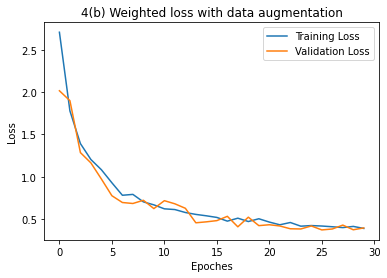

In [7]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q4_b")
plt.show()

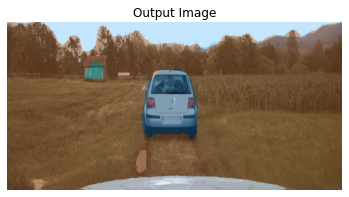

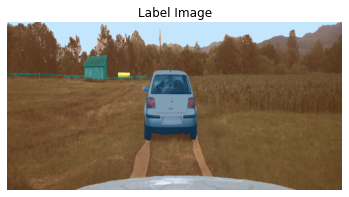

0

In [8]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize(model_name, test_loader, device)